## DA_Fall21_HW_2_Jonathan_Yulan
### Due Date: 11/11 before Mid-night
### Linear Regression and Logistisc Regression 

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Part 1 of this HW is on building a Linear Regression model using housing data and a Logistic Regression model.

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [11]:
housing = pd.read_csv("USA_housing.csv")
print(housing.shape)
housing.isnull().any()

(5000, 7)


Income                  False
HouseAge                False
NumberOfRooms           False
AreaNumberOfBedrooms    False
Population              False
Price                   False
Address                 False
dtype: bool

In [10]:
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [14]:
print(housing.describe())

              Income     HouseAge  NumberOfRooms  AreaNumberOfBedrooms  \
count    5000.000000  5000.000000    5000.000000           5000.000000   
mean    68583.108984     5.977222       6.987792              3.981330   
std     10657.991214     0.991456       1.005833              1.234137   
min     17796.631190     2.644304       3.236194              2.000000   
25%     61480.562390     5.322283       6.299250              3.140000   
50%     68804.286405     5.970429       7.002902              4.050000   
75%     75783.338665     6.650808       7.665871              4.490000   
max    107701.748400     9.519088      10.759588              6.500000   

         Population         Price  
count   5000.000000  5.000000e+03  
mean   36163.516039  1.232073e+06  
std     9925.650114  3.531176e+05  
min      172.610686  1.593866e+04  
25%    29403.928700  9.975771e+05  
50%    36199.406690  1.232669e+06  
75%    42861.290770  1.471210e+06  
max    69621.713380  2.469066e+06  


***Follow the standard way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

***Part 1: Type your code and answers here***

In [118]:
# I - Inspect and explore data.
# S - Select and engineer features.
# B - Build and train model.
# E - Evaluate model.
#1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
housing.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [119]:
# Lets see the correlations between housing price and the three highest correlations based on .corr() 
# Price -> 1. Income 2. HouseAge 3. Population 
# 64% positively correlated with Income 
# 45% positively correlated with HouseAge
# 41% positively correlated with Population 
# The Income, HouseAge, Population are all the independent variables we are testing against the dependent variable of Price 

<AxesSubplot:xlabel='Income', ylabel='Price'>

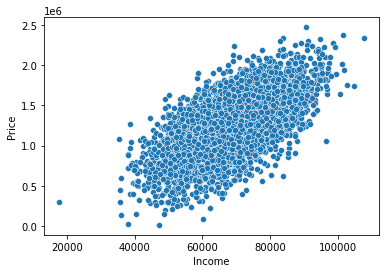

In [18]:
# 1st Scatter Plot between Price and Income 
sns.scatterplot(x='Income', y = 'Price', data=housing)

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

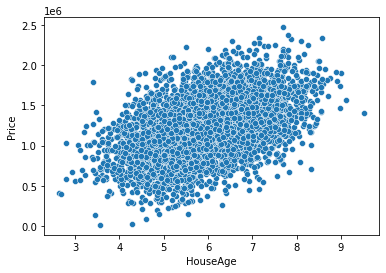

In [19]:
# 2nd Scatter Plot between Price and HouseAge 
sns.scatterplot(x='HouseAge', y = 'Price', data=housing)

<AxesSubplot:xlabel='Population', ylabel='Price'>

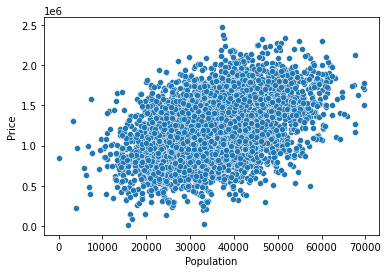

In [20]:
# 3rd Scatter Plot between Price and Population 
sns.scatterplot(x='Population', y = 'Price', data=housing)

In [42]:
#2. Build a one-factor Linear Regression model using that variable

# Being that Price was most positively correlated as well as correlated in general with income lets focus on that variable
# price - dependent (y) variable
# income - independent (x) variable
Xarray = housing['Income'].values
Yarray = housing['Price'].values

# Reshape to allow for utilization in linear model
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

# Create our model1
from sklearn.linear_model import LinearRegression
housing1_model = LinearRegression()
housing1_model.fit(X, Y)

print(housing1_model.intercept_)
print(housing1_model.coef_)

[-221579.47822252]
[[21.19548317]]


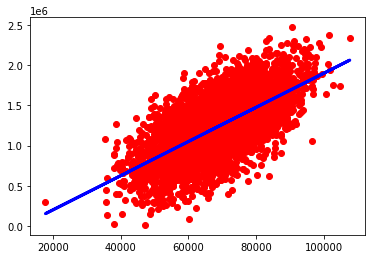

In [43]:
# Splitting and Training our model 
Y_pred = housing1_model.predict(X)

# This scatterplot should essentially be the same as above but using the Y_pred in our .plot data 
plt.scatter(X, Y, color='red')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()

In [44]:
# Split the Training Data 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])
print(0.2 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0
1000.0


In [45]:
housing2_model = LinearRegression()
housing2_model.fit(X_train, Y_train)
print(housing2_model.intercept_)
print(housing2_model.coef_)

[-224617.80110797]
[[21.24368249]]


In [46]:
print(f'Housing Model(1st) Intercept:{housing1_model.intercept_} & Housing Model(1st) Coefficient:{housing1_model.coef_}')
print(f'Housing Model(2nd) Intercept:{housing2_model.intercept_} & Housing Model(2nd) Coefficient:{housing2_model.coef_}')

Housing Model(1st) Intercept:[-221579.47822252] & Housing Model(1st) Coefficient:[[21.19548317]]
Housing Model(2nd) Intercept:[-224617.80110797] & Housing Model(2nd) Coefficient:[[21.24368249]]


In [47]:
# Getting the new Y_pred from the 2nd housing2_model we just built 
Y_pred = housing2_model.predict(X_test)

In [48]:
#3. Print out the model performance metrics (MSE, R-square).
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 219728.3360181176
Mean Squared Error: 74084394120.77266
Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


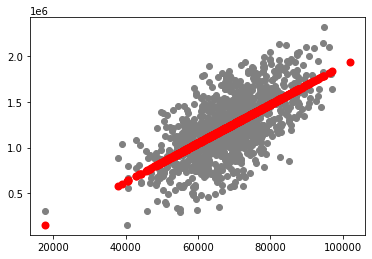

In [49]:
#4. Plot your best-fitted line on top of the data.
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [51]:
#5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.

# Before doing this lets just check if our RSME stays good and permits us to continue
# New testing_size number implemented with a different coefficient 
# As we have done before split our training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.6 * housing.shape[0])

(2500, 1)
(2500, 1)
(2500, 1)
(2500, 1)
3000.0


In [52]:
# 3rd model built to check for consistently good RSME
housing3_model = LinearRegression()
housing3_model.fit(X_train, Y_train)
print(housing3_model.intercept_)
print(housing3_model.coef_)

[-207857.00714342]
[[20.94244391]]


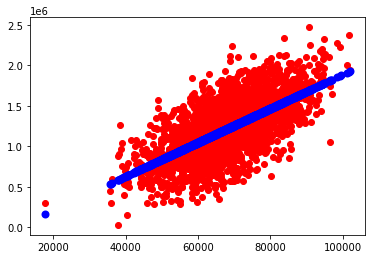

Mean Absolute Error: 219935.88761759983
Mean Squared Error: 75059113186.67674
Root Mean Squared Error: 273969.1829142043
R-squared: 0.41241758376367277


In [61]:
# print against one another
Y_pred = housing3_model.predict(X_test)
plt.scatter(X_test, Y_test, color='red')
plt.scatter(X_test, Y_pred, color='blue', linewidth=2)
plt.show()
# quite similiar to our 2nd model against true, versus testing models so its indicative that we can go ahead and do more testing
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Trial 0, R-squared: 0.4299693876254397,  Slope: [[21.13185265]], Intercept: [-217179.1957551],  


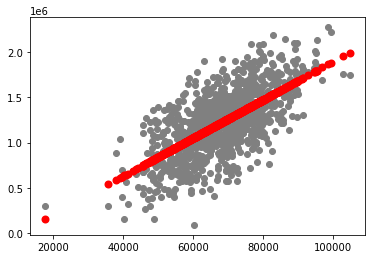

Trial 1, R-squared: 0.41158969645797816,  Slope: [[21.19338464]], Intercept: [-221383.97651978],  


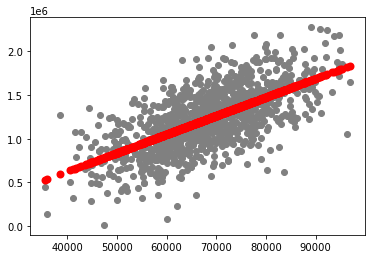

Trial 2, R-squared: 0.3941332925393385,  Slope: [[21.14738144]], Intercept: [-216869.71116479],  


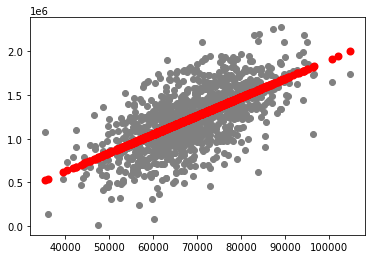

Trial 3, R-squared: 0.43190098649550146,  Slope: [[21.22075464]], Intercept: [-227939.30243307],  


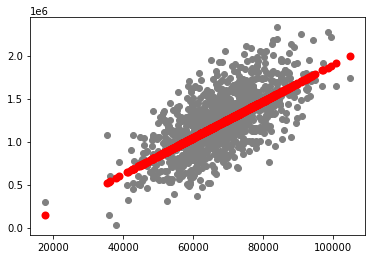

Trial 4, R-squared: 0.40825054328862975,  Slope: [[21.21537948]], Intercept: [-220527.99489406],  


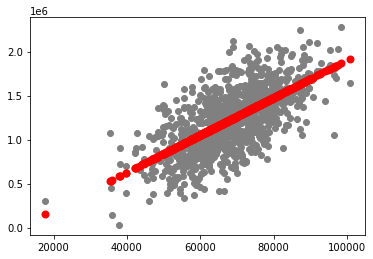

Trial 5, R-squared: 0.4211949801801991,  Slope: [[20.96120688]], Intercept: [-204741.51905627],  


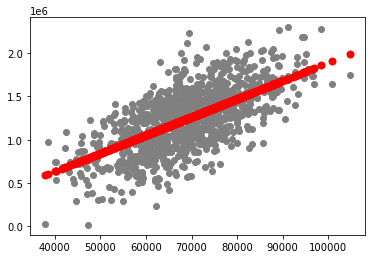

Trial 6, R-squared: 0.38156916650311246,  Slope: [[21.44215808]], Intercept: [-238411.96883362],  


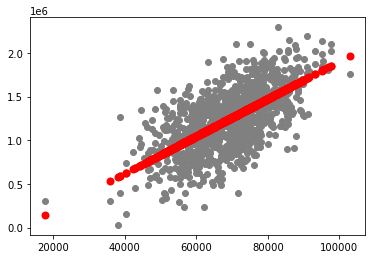

Trial 7, R-squared: 0.42244177137647376,  Slope: [[21.0088017]], Intercept: [-205833.71533596],  


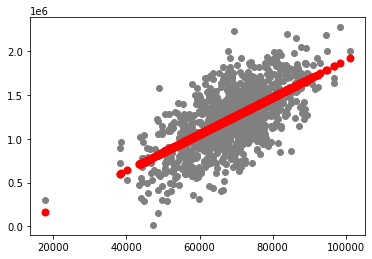

Trial 8, R-squared: 0.4428284799376305,  Slope: [[20.84909853]], Intercept: [-197111.31852912],  


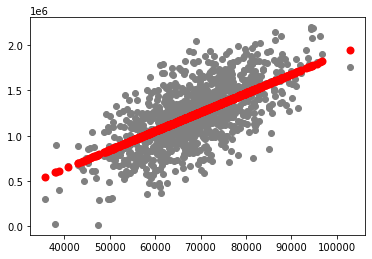

Trial 9, R-squared: 0.4003405657658582,  Slope: [[21.13615767]], Intercept: [-220025.87382135],  


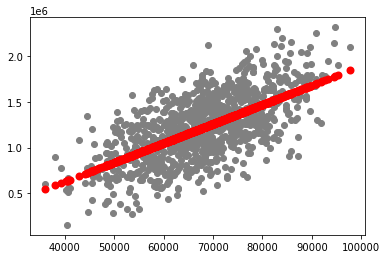

In [63]:
#5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
# import random library 
import random

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))
    plt.scatter(X_test, Y_test,  color='gray')
    plt.scatter(X_test, Y_pred, color='red', linewidth=2)
    plt.show()

0.3905717345533415


,trial,Rsquare
0,0,0.415753
1,1,0.382489
2,2,0.410630
3,3,0.403445
4,4,0.355185
5,5,0.408634
6,6,0.403875
7,7,0.332922
8,8,0.388372
9,9,0.404414


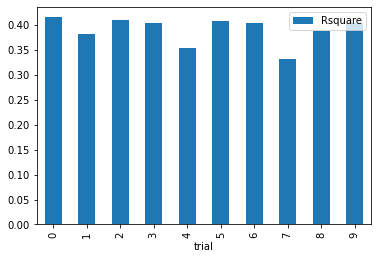

In [68]:
# Now lets collect those 10 r-squared values and plot for easier analysis
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')
print(rdf['Rsquare'].mean())
rdf

In [75]:
"""Does this regression model pass our 10-fold cross validation? Yes it does, I base this on the fact that the RSquare values are fairly consistent with one another. The furthest values from one another in the RSquared Data Set are .332922 and .415753 which are fairly close to one another. This in addition and coupled with the fact that are coeffiecient values made of slope and intercept values were also fairly consistent with one another. Thus we can conclude this is a good model for prediction pertaining to the correlation between Price and Income """

'Does this regression model pass our 10-fold cross validation? Yes it does, I base this on the fact that the RSquare values are fairly consistent with one another. The furthest values from one another in the RSquared Data Set are .332922 and .415753 which are fairly close to one another. This in addition and coupled with the fact that are coeffiecient values made of slope and intercept values were also fairly consistent with one another. Thus we can conclude this is a good model for prediction pertaining to the correlation between Price and Income '

In [78]:
#6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.
X_2 = housing[['Income','HouseAge']].values.reshape(-1, 2)
Y_2 = housing['Price'].values.reshape(-1, 1)
 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=0)
print(X2_train.shape, X2_test.shape)
print(Y2_train.shape, Y2_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [83]:
model_2var = LinearRegression()
model_2var.fit(X2_train, Y2_train)
Y2_pred = model_2var.predict(X2_test)
print(model_2var.coef_)
print(model_2var.intercept_)

[[2.12204386e+01 1.60427782e+05]]
[-1181216.65021218]


R-squared: 0.6111416177920193


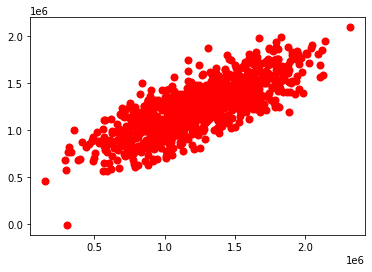

In [81]:
plt.scatter(Y2_test, Y2_pred, color='red', linewidth=2)
print('R-squared:', metrics.r2_score(Y2_test, Y2_pred))
plt.show()

Trial 0, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 1, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 2, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 3, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 4, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 5, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 6, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 7, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01 1.60427782e+05]], Intercept: [-1181216.65021218],  
Trial 8, R-squared: 0.6111416177920193,  Slope: [[2.12204386e+01

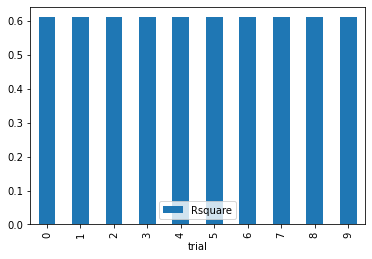

In [91]:
rsquare_2var = []
for i in range(10):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=0)
    model_2var = LinearRegression()
    model_2var.fit(X2_train, Y2_train)
    Y2_pred = model_2var.predict(X2_test)
    rsquare_2var.append(metrics.r2_score(Y2_test, Y2_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y2_test, Y2_pred), \
                                                                      model_2var.coef_, model_2var.intercept_))

    
rdf_2var = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare_2var})
rdf_2var.plot.bar(x='trial', y='Rsquare')
print(f'The RSquare value mean is:{rdf_2var.Rsquare.mean()}')

In [92]:
"""Using the two variables in our logistic model that were clearly the most correlated based on the correlations we saw previously. It intutively makes sense that this 2 independent variable model would serve as a good model in order to predict price solely based on the independent variables that we listed here with the highest correlations(*Income and HouseAge*)"""

'Using the two variables in our logistic model that were clearly the most correlated based on the correlations we saw previously. It intutively makes sense that this 2 independent variable model would serve as a good model in order to predict price solely based on the independent variables that we listed here with the highest correlations(*Income and HouseAge*)'

### Part 2: Build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [164]:
# Load the dataset
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [165]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [166]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [167]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


In [168]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [169]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


### let's group by has or no affairs rows

In [170]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb
had_affair,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758
1,3.619555,30.537019,10.770389,1.686515,2.290547,13.876274,3.796108


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

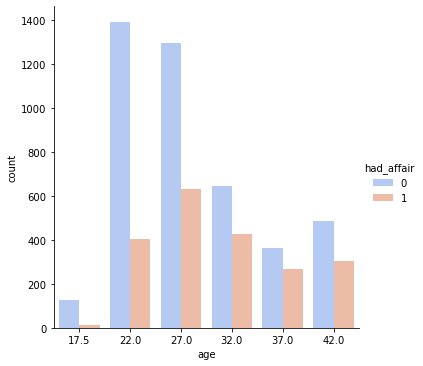

In [171]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

***Follow the standard proper way of building a model and in particular,***

1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Build Logistic Regression model with all the numerical variables.
4. Print out the model performance metrics (precision/recall)
5. Do a countplot on the categorical variables
6. Call the get_dummies method to create the dummies variables for the categorical variables
7. Build another Logistic Regression model that include these dummies variabes.
8. Comment on your results based on the performance metrics

***Part 2: Type your code and answers here***

In [172]:
# 1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
affair_df = df.sample(int(df.shape[0] * 0.8))
print(affair_df.shape)
affair_df.head()

(5176, 9)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
4795,5.0,42.0,23.0,3.0,3.0,16.0,occ4,2.0,0
2562,2.0,42.0,23.0,2.0,2.0,12.0,occ3,5.0,0
4983,5.0,42.0,23.0,5.5,4.0,17.0,occ4,6.0,0
3380,4.0,27.0,6.0,2.0,1.0,12.0,occ2,2.0,0
5475,5.0,42.0,23.0,5.5,3.0,12.0,occ5,4.0,0


In [173]:
testing_rows = [idx for idx in affair_df.index if idx not in affair_df.index]
len(testing_rows)

0

<AxesSubplot:>

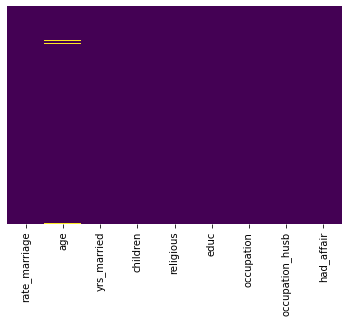

In [175]:
sns.heatmap(affair_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [176]:
affair_df.isnull().any()

rate_marriage      False
age                 True
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
had_affair         False
dtype: bool

In [177]:
# before SANITY check
affair_df.age.isnull().any()

True

In [178]:
# lets drop those values as requested as there arent missing from 'AGE'
affair_df.dropna(inplace=True)

In [179]:
# after SANITY check
affair_df.age.isnull().any()

False

In [180]:
affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
4795,5.0,42.0,23.0,3.0,3.0,16.0,occ4,2.0,0
2562,2.0,42.0,23.0,2.0,2.0,12.0,occ3,5.0,0
4983,5.0,42.0,23.0,5.5,4.0,17.0,occ4,6.0,0
3380,4.0,27.0,6.0,2.0,1.0,12.0,occ2,2.0,0
5475,5.0,42.0,23.0,5.5,3.0,12.0,occ5,4.0,0


'Based what is shown in this factorplot, it is indicative that women who have children or do not have children may not be a strongly influential factor that factors in whether a woman cheats or not. The blue bars are indicative of women who do not cheat, and the red bars are indicate woman who have cheated with the number of children increasing across the x-axis. While the bars change at points, the difference between those bars are the relative proportions to one another are fairly consistent with one another. '

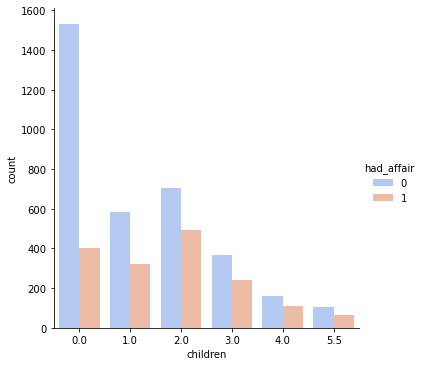

In [183]:
# 2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
# Children
sns.factorplot('children', kind='count', hue='had_affair', data=affair_df,palette='coolwarm')
'''Based what is shown in this factorplot, it is indicative that women who have children or do not have children may not be a strongly influential factor that factors in whether a woman cheats or not. The blue bars are indicative of women who do not cheat, and the red bars are indicate woman who have cheated with the number of children increasing across the x-axis. While the bars change at points, the difference between those bars are the relative proportions to one another are fairly consistent with one another. '''

'This factorplot that years marriage may be a factor that should be considered when factoring/deciding whether a woman will cheat or not. Here You can seee the proportions or relative changes between the different years marriage changes rapidly and become fairly close to one another the more years that a couple has been married.'

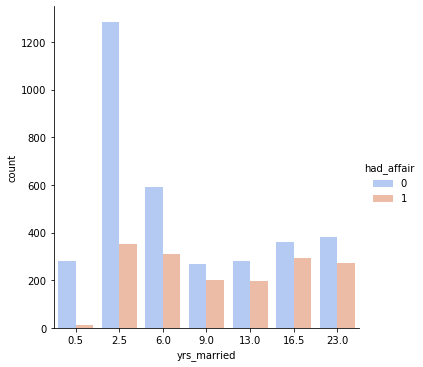

In [184]:
# 2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
# Number of Years 
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=affair_df,palette='coolwarm')
'''This factorplot that years marriage may be a factor that should be considered when factoring/deciding whether a woman will cheat or not. Here You can seee the proportions or relative changes between the different years marriage changes rapidly and become fairly close to one another the more years that a couple has been married.'''

In [185]:
# 3. Build Logistic Regression model with all the numerical variables.
affair_train = affair_df[['had_affair','age','yrs_married', 'children']]
affair_train.head()

,had_affair,age,yrs_married,children
4795,0,42.0,23.0,3.0
2562,0,42.0,23.0,2.0
4983,0,42.0,23.0,5.5
3380,0,27.0,6.0,2.0
5475,0,42.0,23.0,5.5


In [191]:
from sklearn.model_selection import train_test_split

Xa_train, Xa_test, ya_train, ya_test = train_test_split(affair_train.drop('had_affair',axis=1), 
                                                    affair_train['had_affair'], test_size=0.20, 
                                                    random_state=101)

from sklearn.linear_model import LogisticRegression

affair_model = LogisticRegression()
affair_model.fit(Xa_train,ya_train)

LogisticRegression()

In [192]:
affair_predictions = affair_model.predict(Xa_test)

In [193]:
# 4. Print out the model performance metrics (precision/recall)
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(ya_test,affair_predictions))
print(accuracy_score(ya_test, affair_predictions))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       696
           1       0.34      0.07      0.12       322

    accuracy                           0.66      1018
   macro avg       0.51      0.50      0.45      1018
weighted avg       0.58      0.66      0.58      1018

0.6630648330058939


<AxesSubplot:xlabel='had_affair', ylabel='count'>

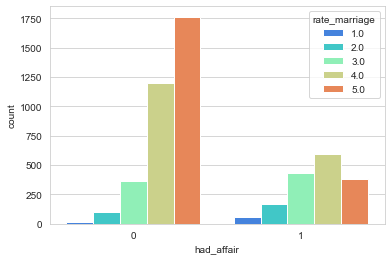

In [195]:
# 5. Do a countplot on the categorical variables
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='rate_marriage',data=affair_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

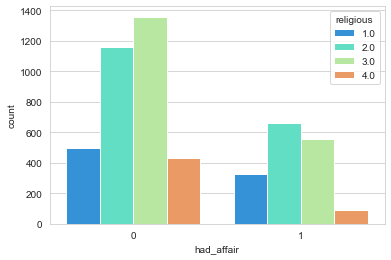

In [196]:
# 5. Do a countplot on the categorical variables
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='religious',data=affair_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

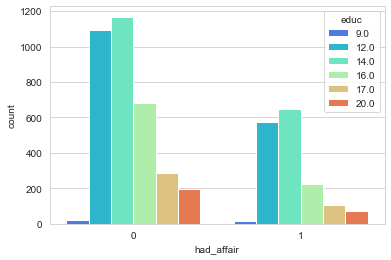

In [197]:
# 5. Do a countplot on the categorical variables
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='educ',data=affair_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

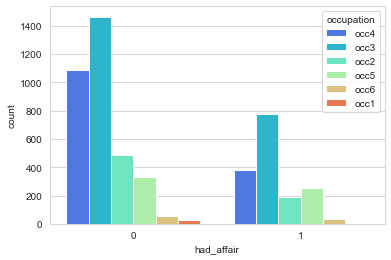

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation',data=affair_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

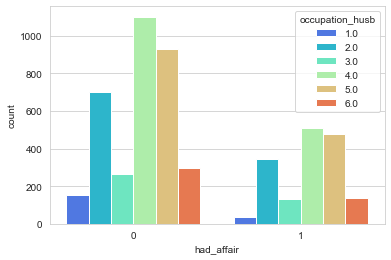

In [199]:
# 5. Do a countplot on the categorical variables
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation_husb',data=affair_df,palette='rainbow')

In [200]:
# 6. Call the get_dummies method to create the dummies variables for the categorical variables
# dropping categorical variables into numerical for processing for occupation_husband
occupation_husb = pd.get_dummies(affair_df['occupation_husb'],drop_first=True)
# dropping categorical variables into numerical for processing for occupation_woman
occupation = pd.get_dummies(affair_df['occupation'],drop_first=True)
# dropping categorical variables into numerical for processing for religious
religious = pd.get_dummies(affair_df['religious'],drop_first=True)
# dropping categorical variables into numerical for processing for education
educ = pd.get_dummies(affair_df['educ'],drop_first=True)
# dropping categorical variables into numerical for processing for rate_marriage
rate_marriage = pd.get_dummies(affair_df['rate_marriage'],drop_first=True)

In [201]:
occupation_husb

,2.0,3.0,4.0,5.0,6.0
4795,1,0,0,0,0
2562,0,0,0,1,0
4983,0,0,0,0,1
3380,1,0,0,0,0
5475,0,0,1,0,0
...,...,...,...,...,...
4287,0,0,1,0,0
4100,1,0,0,0,0
5334,0,0,1,0,0
6220,0,0,0,1,0


In [202]:
occupation

,occ2,occ3,occ4,occ5,occ6
4795,0,0,1,0,0
2562,0,1,0,0,0
4983,0,0,1,0,0
3380,1,0,0,0,0
5475,0,0,0,1,0
...,...,...,...,...,...
4287,0,0,1,0,0
4100,0,0,1,0,0
5334,0,0,1,0,0
6220,0,0,0,1,0


In [203]:
religious

,2.0,3.0,4.0
4795,0,1,0
2562,1,0,0
4983,0,0,1
3380,0,0,0
5475,0,1,0
...,...,...,...
4287,0,1,0
4100,1,0,0
5334,0,1,0
6220,0,1,0


In [204]:
educ

,12.0,14.0,16.0,17.0,20.0
4795,0,0,1,0,0
2562,1,0,0,0,0
4983,0,0,0,1,0
3380,1,0,0,0,0
5475,1,0,0,0,0
...,...,...,...,...,...
4287,0,1,0,0,0
4100,0,0,1,0,0
5334,0,1,0,0,0
6220,1,0,0,0,0


In [205]:
rate_marriage

,2.0,3.0,4.0,5.0
4795,0,0,0,1
2562,1,0,0,0
4983,0,0,0,1
3380,0,0,1,0
5475,0,0,0,1
...,...,...,...,...
4287,0,0,0,1
4100,0,1,0,0
5334,0,1,0,0
6220,0,0,0,1


In [206]:
# 7. Build another Logistic Regression model that include these dummies variabes.
affair_train.head()

,had_affair,age,yrs_married,children
4795,0,42.0,23.0,3.0
2562,0,42.0,23.0,2.0
4983,0,42.0,23.0,5.5
3380,0,27.0,6.0,2.0
5475,0,42.0,23.0,5.5


In [207]:
affair_train = pd.concat([affair_train, occupation_husb, occupation,religious,educ, rate_marriage], axis=1)
affair_train.head()

,had_affair,age,yrs_married,children,2.0,3.0,4.0,5.0,6.0,occ2,...,4.0,12.0,14.0,16.0,17.0,20.0,2.0,3.0,4.0,5.0
4795,0,42.0,23.0,3.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2562,0,42.0,23.0,2.0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4983,0,42.0,23.0,5.5,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3380,0,27.0,6.0,2.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5475,0,42.0,23.0,5.5,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [208]:
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(affair_train.drop('had_affair',axis=1), 
                                                    affair_train['had_affair'], test_size=0.20, 
                                                    random_state=101)

from sklearn.linear_model import LogisticRegression

affair_model_2 = LogisticRegression()
affair_model_2.fit(Xb_train,yb_train)
affair_predictions_2 = affair_model_2.predict(Xb_test)
print(classification_report(yb_test,affair_predictions_2))
print(accuracy_score(yb_test, affair_predictions_2))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       696
           1       0.59      0.37      0.46       322

    accuracy                           0.72      1018
   macro avg       0.67      0.63      0.63      1018
weighted avg       0.70      0.72      0.70      1018

0.7180746561886051


In [209]:
# 8. Comment on your results based on the performance metrics
'''My previous value was with an accuracy score of 66% roughly when only using the numerical variables as possible independent values that could be influencing whether a woman would have an affair. When we created a new model, that used categorical variables that were previously unable to be used to their floating point values we increased teh score roughly to 72% which is an increase of 6% which is SIGNIFIGANT. Our new model that includes categorical data that is able to be utilized is a model that will predict the results roughly about 72% of the time which makes it a strong model (*>70%)'''

'My previous value was with an accuracy score of 66% roughly when only using the numerical variables as possible independent values that could be influencing whether a woman would have an affair. When we created a new model, that used categorical variables that were previously unable to be used to their floating point values we increased teh score roughly to 72% which is an increase of 6% which is SIGNIFIGANT. Our new model that includes categorical data that is able to be utilized is a model that will predict the results roughly about 72% of the time which makes it a strong model (*>70%)'